# Linear model for the minimum-variance control


TODO : add instances as in ANR-REM_data/AnticipationPursuit/Data_analysis/Oldies/2016-09-08%20Harris%20%26%20Wolpert_Testing%20the%20linear%20model.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from HarrisWolpertandPursuit import MinimumVarianceControl, control_learning
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=5.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=5.)

In [3]:
from PlotFunctions import all_plots

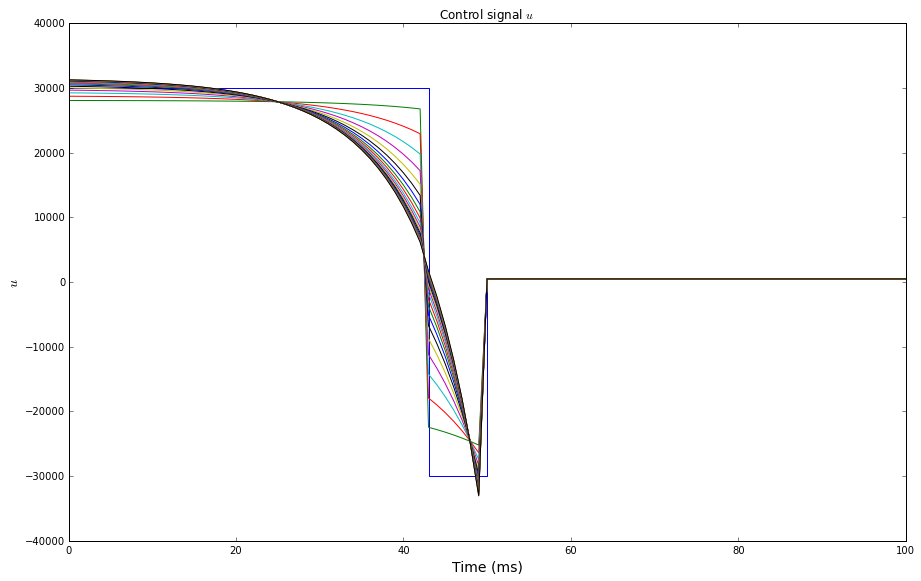

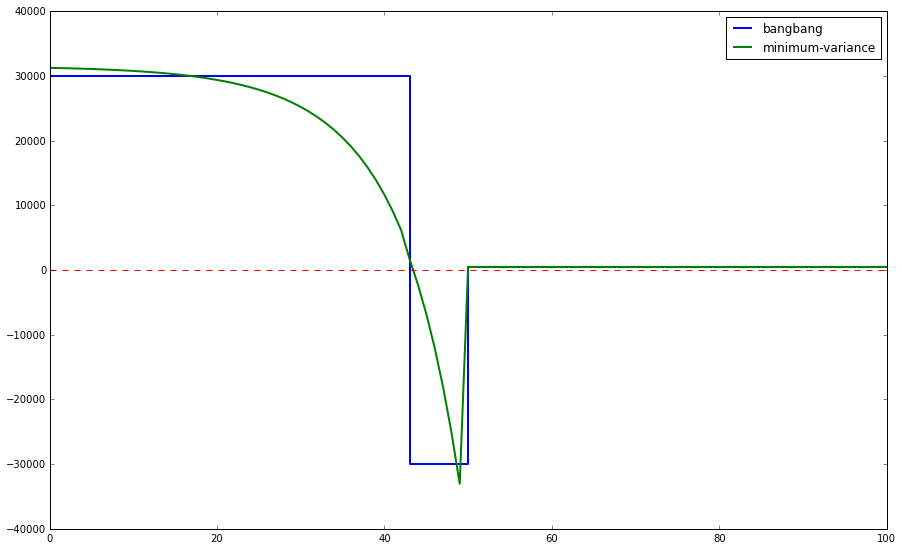

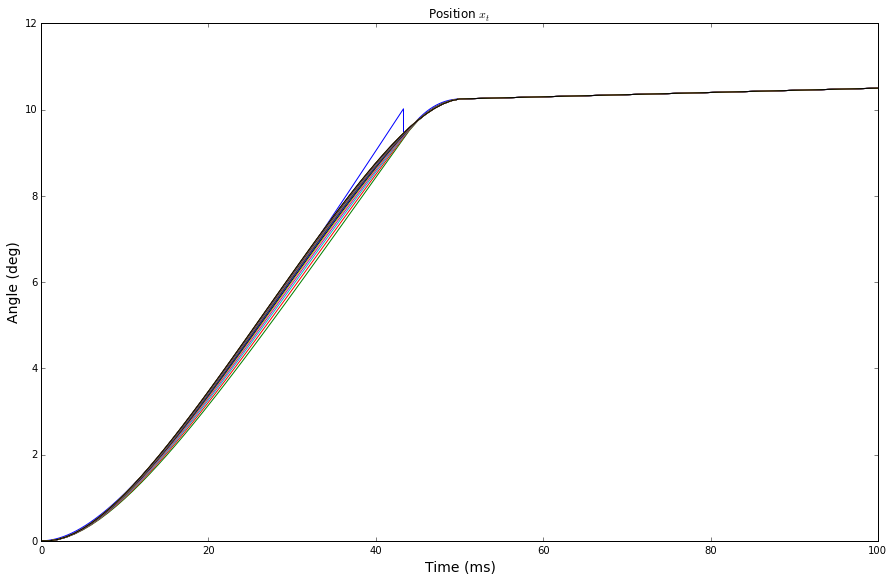

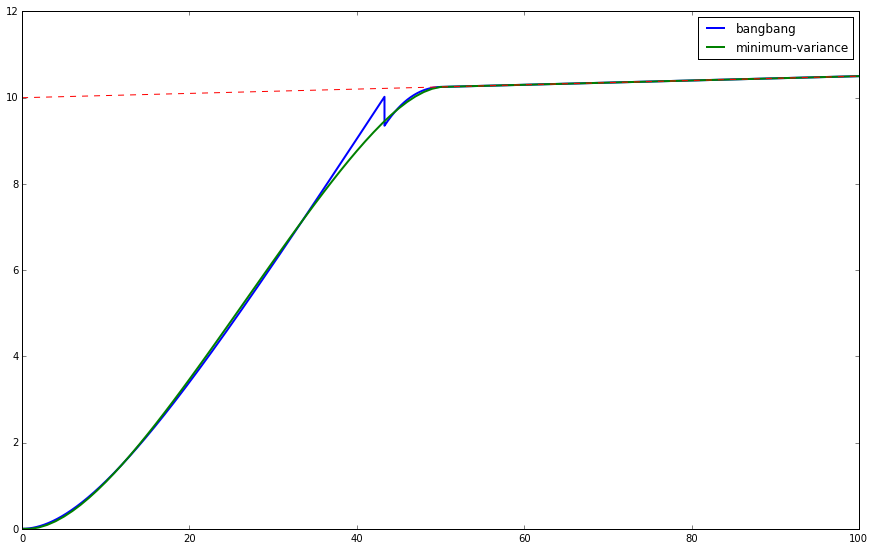

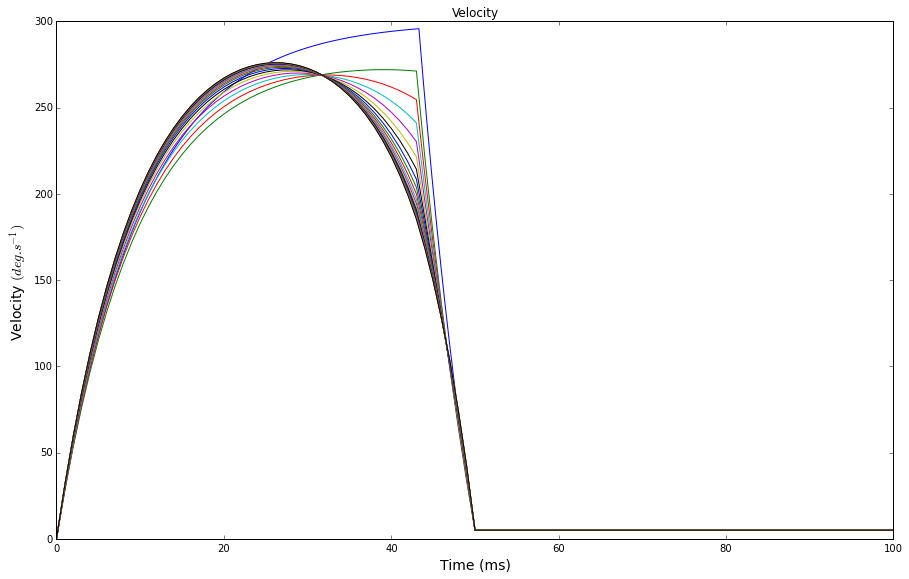

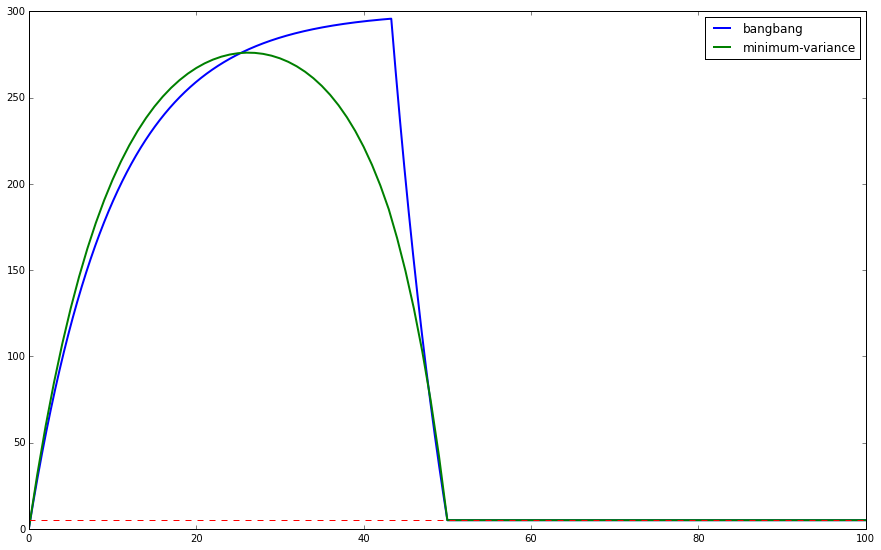

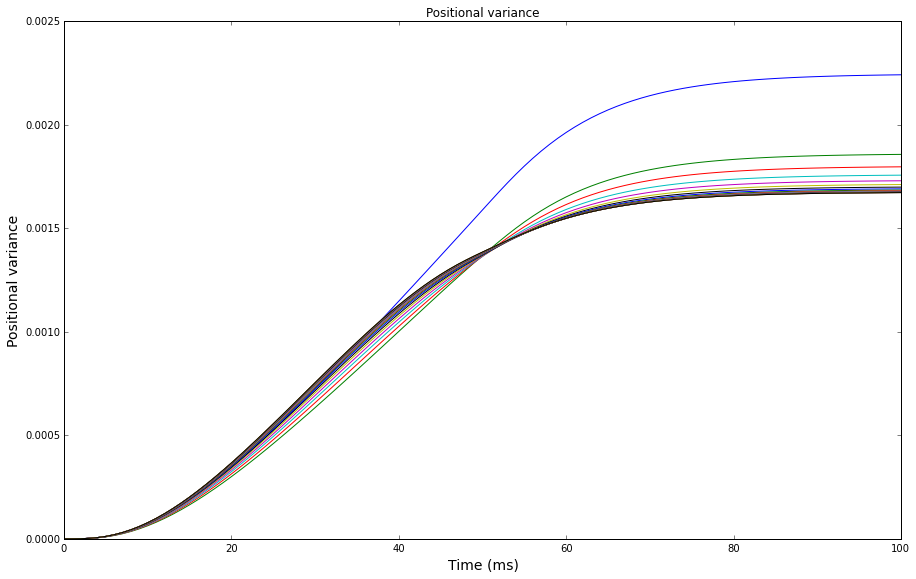

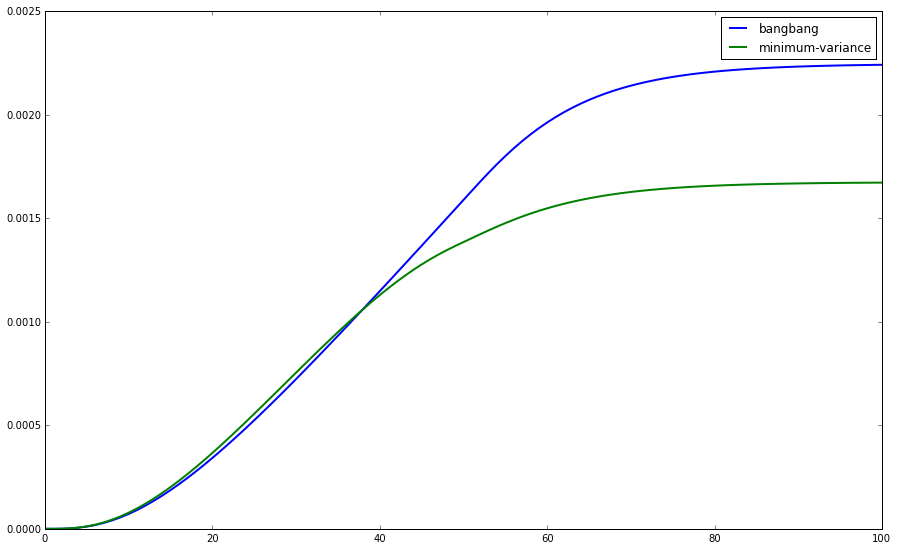

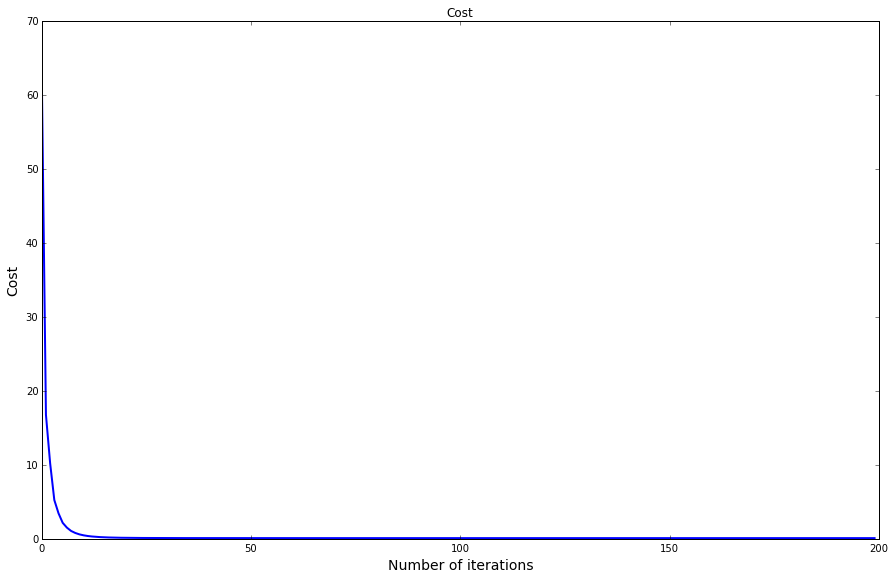

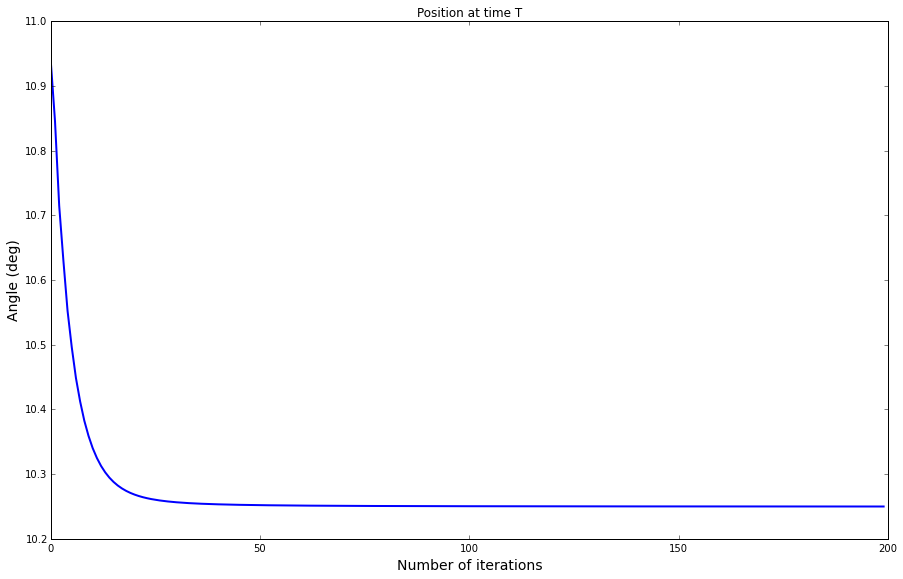

In [ ]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [ ]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=10.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=10.)

In [ ]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [ ]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=15.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=15.)

In [ ]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [ ]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000,record_each = 60000, eta=800000, v=20.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1200000, record_each = 60000, eta=800000, v=20.)

In [ ]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)

In [11]:
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1000000,record_each = 50000, eta=800000, v=0.)
u,record=control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 1000000, record_each = 50000, eta=800000, v=0.)

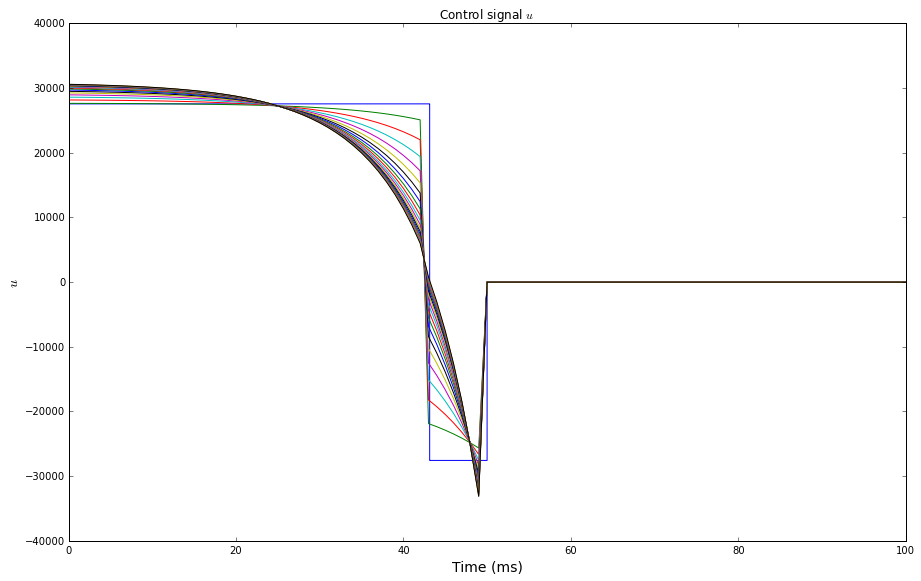

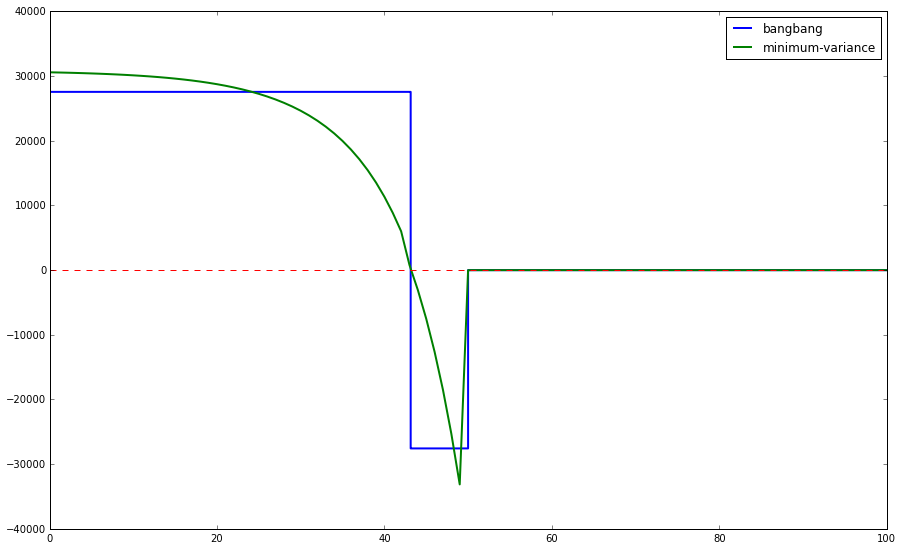

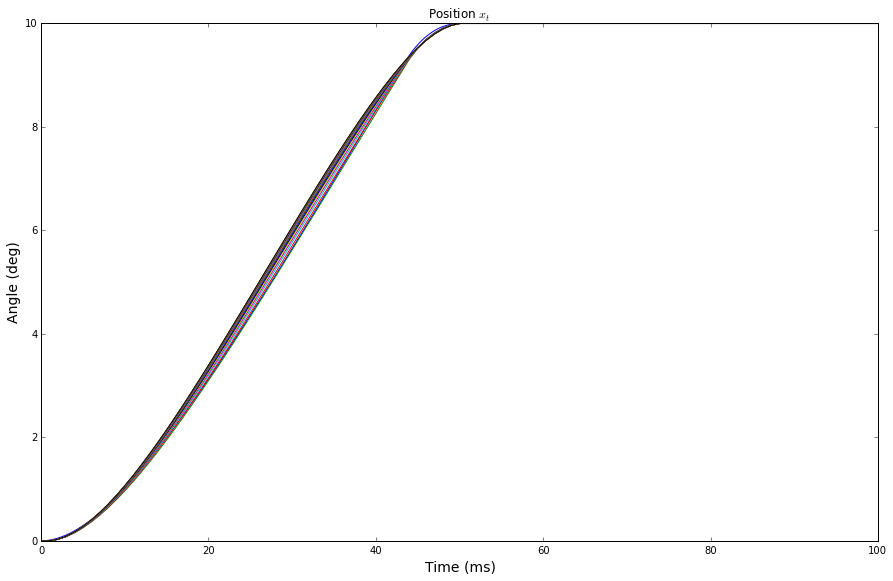

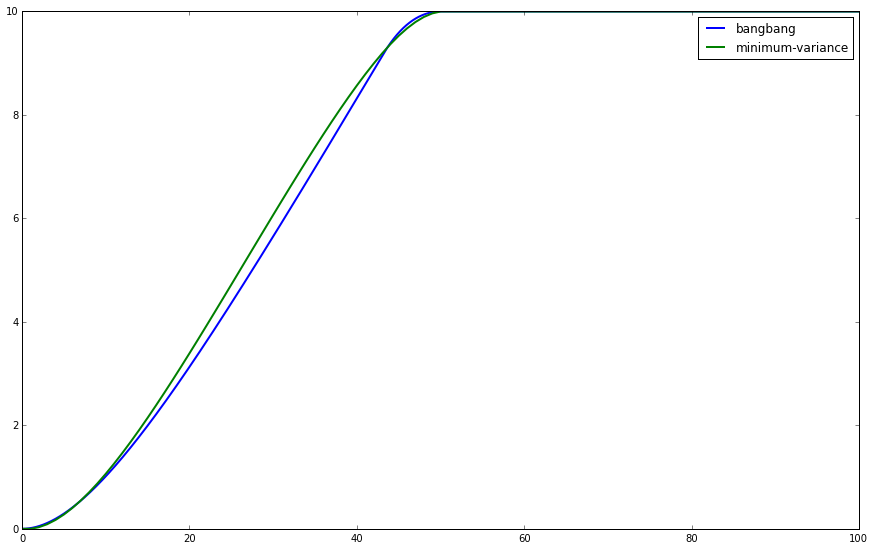

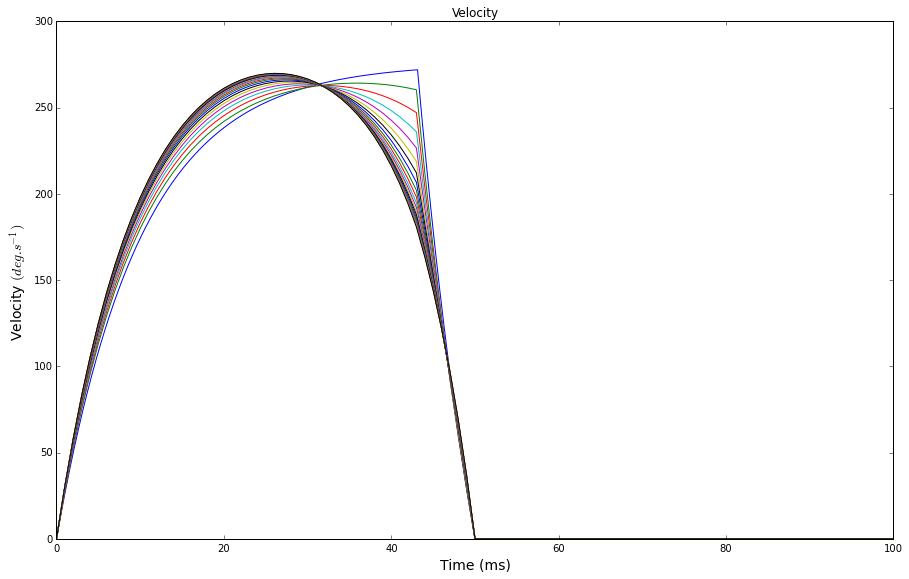

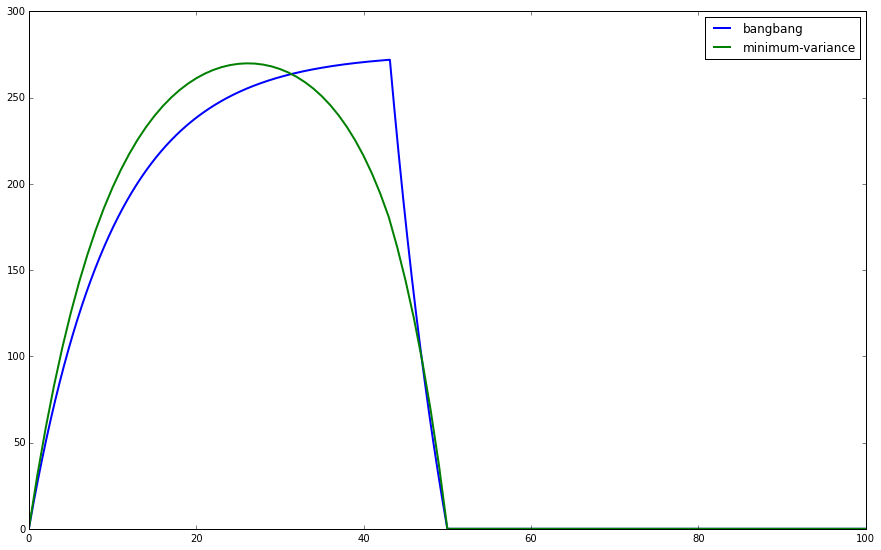

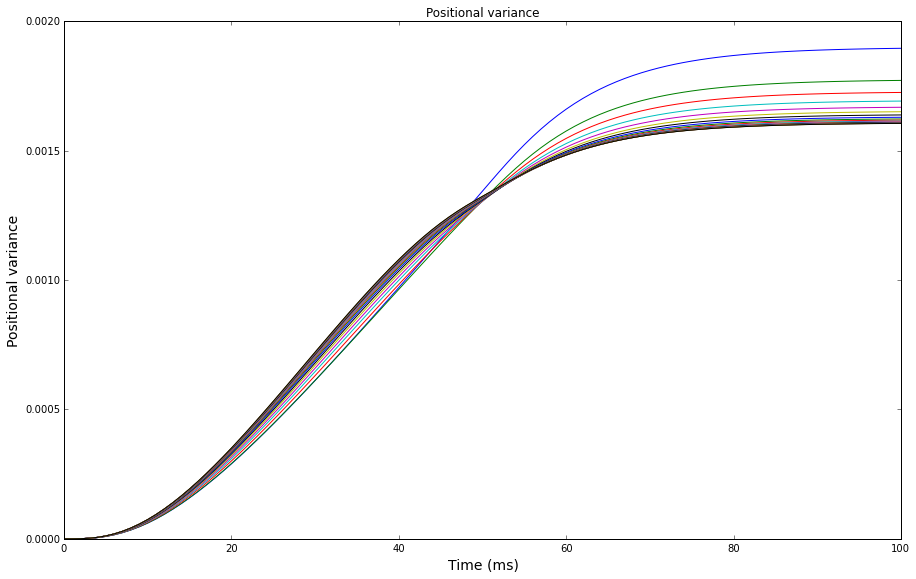

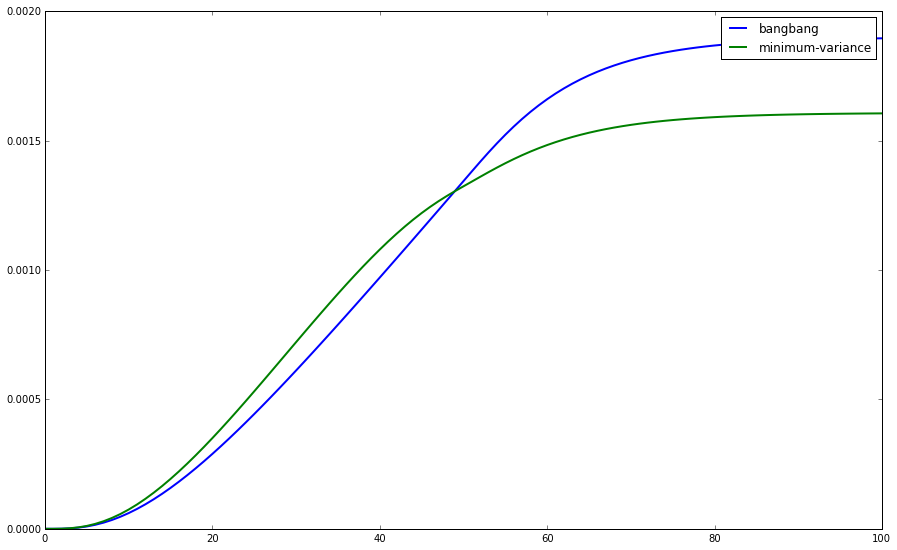

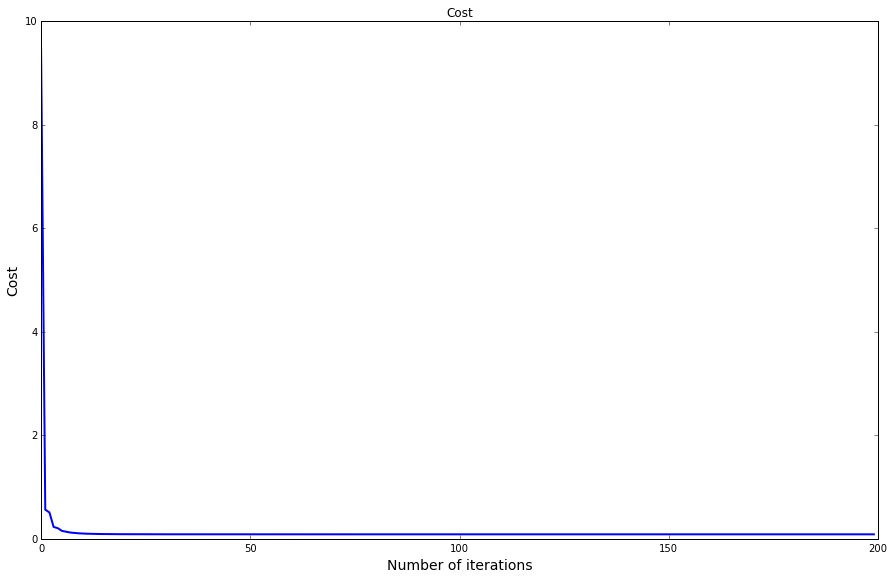

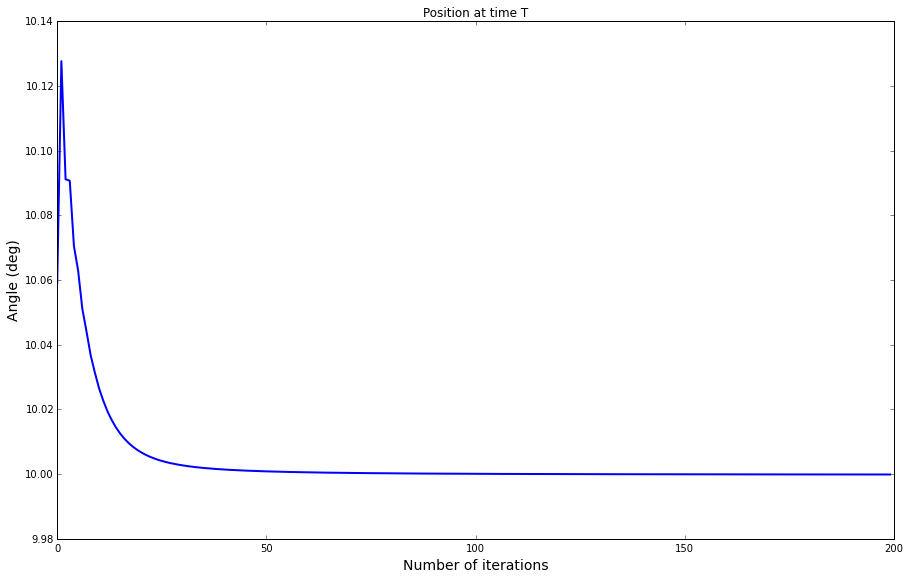

In [12]:
all_plots(record, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)